# Setup
Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

fatal: destination path 'yolov5' already exists and is not an empty directory.
/opt/app-root/src/pokedex-demo/Notebooks/yolov5

[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Install opencv-python-headless many to avoid *ImportError: libGL.so.1: cannot open shared object file: No such file or directory*

In [3]:
!pip install opencv-python-headless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 263.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-228-g4d687c8 Python-3.9.16 torch-1.13.1+cu117 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (4 CPUs, 15.3 GB RAM, 29.2/99.4 GB disk)


# Data preparation
Data preparation is usually a big task. You might have to clean the data. Label the data - in computer vision it means creating the bounding boxes. And also split the data into training and test data sets.

We are lucky, because this (hard) work has been done already. You just need to Unzip the images and annotations.

**Unzip the images and annotations:**

In [5]:
!ls -l /opt/app-root/src/pokedex-demo/database/PokemonYOLOv5/*

-rw-rw-r--. 1 1000770000 1000770000 1844 Oct 25 23:40 /opt/app-root/src/pokedex-demo/database/PokemonYOLOv5/data.yaml
-rw-rw-r--. 1 1000770000 1000770000  138 Oct 25 20:02 /opt/app-root/src/pokedex-demo/database/PokemonYOLOv5/README.dataset.txt
-rw-rw-r--. 1 1000770000 1000770000  424 Oct 25 20:02 /opt/app-root/src/pokedex-demo/database/PokemonYOLOv5/README.roboflow.txt

/opt/app-root/src/pokedex-demo/database/PokemonYOLOv5/test:
total 28
drwxrwsr-x. 3 1000770000 1000770000 12288 Oct 25 23:34 images
drwxrwsr-x. 2 1000770000 1000770000 16384 Oct 25 20:28 labels

/opt/app-root/src/pokedex-demo/database/PokemonYOLOv5/train:
total 368
drwxrwsr-x. 3 1000770000 1000770000  86016 Oct 25 20:26 images
drwxrwsr-x. 2 1000770000 1000770000  86016 Oct 25 20:27 labels
-rw-rw-r--. 1 1000770000 1000770000 200765 Oct 25 20:31 labels.cache

/opt/app-root/src/pokedex-demo/database/PokemonYOLOv5/train2:
total 420
drwxrwsr-x. 3 1000770000 1000770000  94208 Oct 26 03:36 images
drwxrwsr-x. 3 1000770000 10007

**View example image:**

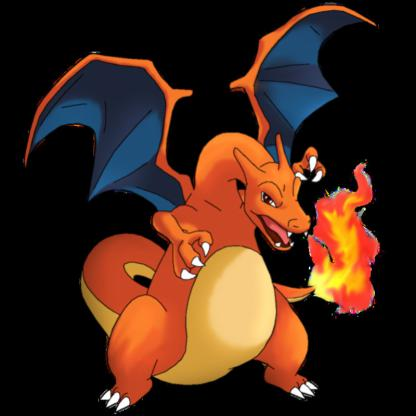

In [6]:
# View image 
display.Image(filename='/opt/app-root/src/pokedex-demo/database/PokemonYOLOv5/valid/images/fed6277326774a829feb7dd4a53217bc_jpg.rf.b74842621792ae50b807f8f511bce674.jpg', width=600)

**Explore the Yolo annotation for the image:**

Let's have look at the annotation file for the image. It contains two "bent".

In [7]:
# Show annotation
!cat /opt/app-root/src/pokedex-demo/database/PokemonYOLOv5/valid/labels/fed6277326774a829feb7dd4a53217bc_jpg.rf.b74842621792ae50b807f8f511bce674.txt

13 0.4879807692307692 0.5036057692307693 0.8870192307692307 0.9915865384615384

# Start model training
Train a YOLOv5m model on the metal-nut data by specifying dataset, batch-size, image size and pretrained --weights yolov5m.pt. Pretrained weights are auto-downloaded from the latest [YOLOv5 release](https://github.com/ultralytics/yolov5/releases).

Before starting, check this:

* *--workers 0* is a workaround for problem with shared memory limit
* Or, extend the share memory for your notebook as describe in the local README.md and remove --workers 0 below.

In [35]:
!python train.py --img 640 --batch 16 --epochs 600 --data /opt/app-root/src/pokedex-demo/database/PokemonYOLOv5/data.yaml --weights yolov5m.pt

train: weights=yolov5m.pt, cfg=, data=/opt/app-root/src/pokedex-demo/database/PokemonYOLOv5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=600, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-228-g4d687c8 Python-3.9.16 torch-1.13.1+cu117 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4

# Image recognition

In [18]:
!python /opt/app-root/src/pokedex-demo/Notebooks/yolov5/detect.py --weights /opt/app-root/src/pokedex-demo/Notebooks/yolov5/runs/train/exp5/weights/best.pt --img 640 --conf 0.25 --source /opt/app-root/src/pokedex-demo/database/Predictions/pokemon6.png


detect: weights=['/opt/app-root/src/pokedex-demo/Notebooks/yolov5/runs/train/exp5/weights/best.pt'], source=/opt/app-root/src/pokedex-demo/database/Predictions/pokemon6.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-228-g4d687c8 Python-3.9.16 torch-1.13.1+cu117 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 21451002 parameters, 0 gradients, 49.8 GFLOPs
image 1/1 /opt/app-root/src/pokedex-demo/database/Predictions/pokemon6.png: 512x640 1 Pikachu, 24.4ms
Speed: 0.6ms pre-process, 24.4ms inference, 2.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp19


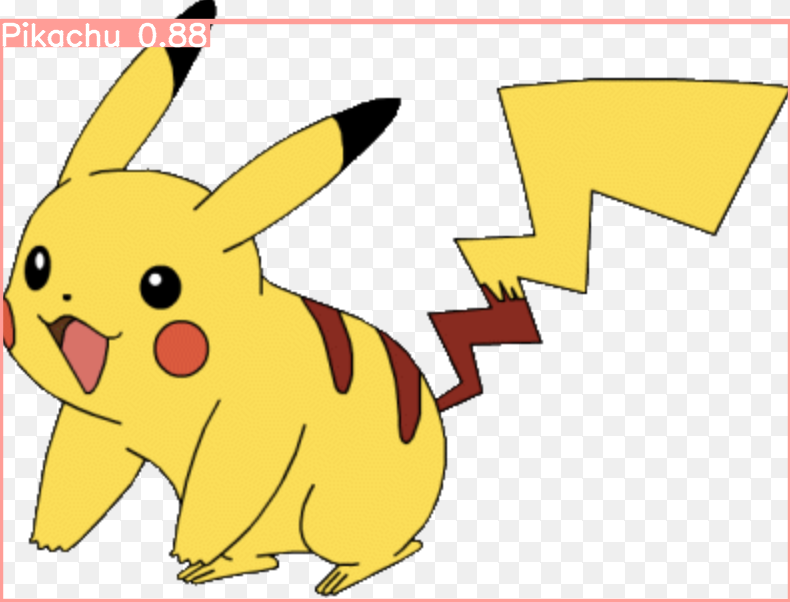

In [24]:
display.Image(filename='/opt/app-root/src/pokedex-demo/Notebooks/yolov5/runs/detect/exp19/pokemon6.png', width=600)

In [ ]:
!python export.py --weights runs/train/exp5/weights/best.pt --include torchscript onnx

export: data=data/coco128.yaml, weights=['runs/train/exp5/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript', 'onnx']
YOLOv5 🚀 v7.0-228-g4d687c8 Python-3.9.16 torch-1.13.1+cu117 CPU

Fusing layers... 
Model summary: 212 layers, 21451002 parameters, 0 gradients, 49.8 GFLOPs

PyTorch: starting from runs/train/exp5/weights/best.pt with output shape (1, 25200, 154) (41.4 MB)

TorchScript: starting export with torch 1.13.1+cu117...
TorchScript: export success ✅ 3.1s, saved as runs/train/exp5/weights/best.torchscript (82.4 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...

[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
  

# Video recognition

In [ ]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img-size 1280 --source /opt/app-root/src/pokedex-demo/database/Predictions/OpeningTheme.mp4

detect: weights=['runs/train/exp5/weights/best.pt'], source=/opt/app-root/src/pokedex-demo/database/Predictions/OpeningTheme.mp4, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-228-g4d687c8 Python-3.9.16 torch-1.13.1+cu117 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 21451002 parameters, 0 gradients, 49.8 GFLOPs
Traceback (most recent call last):
  File "/opt/app-root/src/pokedex-demo/Notebooks/yolov5/detect.py", line 285, in <module>
    main(opt)
  File "/opt/app-root/src/pokedex-demo/Notebooks/yolov5/detect.py", line 280, in main
    run(**vars(opt))
  File "/opt/app-root/lib64/pyt